<a href="https://colab.research.google.com/github/psyduck1203/TSF_GRIP_Tasks/blob/main/Task%201/TSF_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Omkar Kolte**
## Task 1: Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Importing the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Checking for any missing values from the dataset

In [3]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

False means no missing value in the dataset

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the graph

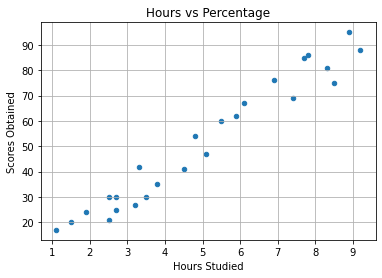

In [5]:
df.plot(kind = 'scatter', x = 'Hours', y = 'Scores', style = 'o')
plt.title("Hours vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.grid()
plt.show()

correlation among the columns in the dataframe using ‘Pearson’ method

In [6]:
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Preparing Data

In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

Spliting the training and test sets using sklearn's built-in function train_test_split()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Training the Model

In [9]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print("Training Done")

Training Done


Displaying the regression coefficient and regression intercept

In [10]:
print(reg.coef_)
print(reg.intercept_)
line = reg.coef_*x + reg.intercept_

[9.91065648]
2.018160041434662


Model Visualization

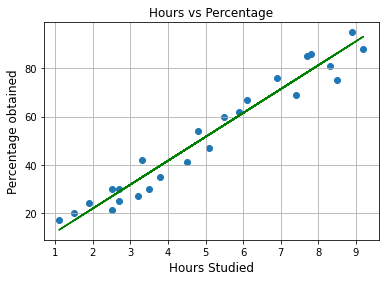

In [11]:
plt.scatter(x, y)
plt.plot(x, line, color = 'green')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied', fontsize = 12)
plt.ylabel('Percentage obtained', fontsize = 12)
plt.grid()
plt.show()

Accuracy of the model

In [12]:
print('Test score = ', reg.score(x_test, y_test))
print('Training score = ', reg.score(x_train, y_train))

Test score =  0.9454906892105354
Training score =  0.9515510725211553


Making Predictions

In [13]:
print(x_test)

# Predicting the scores
y_prediction = reg.predict(x_test)
print(y_prediction)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Comparing Actual vs Predicted

In [14]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


What will be predicted score if a student studies for 9.25 hrs/day?

In [15]:
hr = [[9.25]]
our_pred = reg.predict(hr)
print("Number of hours = {}".format(hr[0][0]))
print("Predicted Scores = {}".format(our_pred[0]))

Number of hours = 9.25
Predicted Scores = 93.69173248737539


Model Evaluation

In [16]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_prediction))

Mean Absolute Error:  4.183859899002982
